In [1]:
#a.Import the datasets into the Python environment 


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [5]:
#b.Examine the dataset's shape and structure, and look out for any outlier 


In [6]:
# Load the datasets
restaurants_path = 'resturants.csv'
sales_path = 'sales.csv'
items_path = 'items.csv'

restaurants_data = pd.read_csv(restaurants_path)
sales_data = pd.read_csv(sales_path)
items_data = pd.read_csv(items_path)

# Preliminary Analysis
def examine_dataset(dataset, name):
    print(f"\n{name} Dataset:")
    print(f"Shape: {dataset.shape}")
    print("Columns:", dataset.columns.tolist())
    print("Sample Rows:\n", dataset.head(), "\n")
    print("Summary Statistics:\n", dataset.describe(include=(np.int64,np.float64)), "\n")
    print("Missing Data:\n", dataset.isna().sum(), "\n")
    print("Data Type:\n", dataset.dtypes, "\n")


In [7]:
#Examine all datasets
examine_dataset(restaurants_data, "Restaurants")



Restaurants Dataset:
Shape: (6, 2)
Columns: ['id', 'name']
Sample Rows:
    id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe 

Summary Statistics:
              id
count  6.000000
mean   3.500000
std    1.870829
min    1.000000
25%    2.250000
50%    3.500000
75%    4.750000
max    6.000000 

Missing Data:
 id      0
name    0
dtype: int64 

Data Type:
 id       int64
name    object
dtype: object 



In [8]:
examine_dataset(sales_data, "Sales")



Sales Dataset:
Shape: (109600, 4)
Columns: ['date', 'item_id', 'price', 'item_count']
Sample Rows:
          date  item_id  price  item_count
0  2019-01-01        3  29.22         2.0
1  2019-01-01        4  26.42        22.0
2  2019-01-01       12   4.87         7.0
3  2019-01-01       13   4.18        12.0
4  2019-01-01       16   3.21       136.0 

Summary Statistics:
              item_id          price     item_count
count  109600.000000  109600.000000  109600.000000
mean       50.500000      11.763700       6.339297
std        28.866202       8.946225      30.003728
min         1.000000       1.390000       0.000000
25%        25.750000       5.280000       0.000000
50%        50.500000       7.625000       0.000000
75%        75.250000      18.790000       0.000000
max       100.000000      53.980000     570.000000 

Missing Data:
 date          0
item_id       0
price         0
item_count    0
dtype: int64 

Data Type:
 date           object
item_id         int64
price        

In [9]:
examine_dataset(items_data, "Items")



Items Dataset:
Shape: (100, 5)
Columns: ['id', 'store_id', 'name', 'kcal', 'cost']
Sample Rows:
    id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07 

Summary Statistics:
                id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000   53.980000 

In [10]:
#c.Merge the datasets into a single dataset that includes the date, item id, price, item count, item names, kcal values, store id, and store name
#Step 1: Merge sales with items on item_id/id
merged_data = sales_data.merge(items_data, left_on='item_id', right_on='id', suffixes=("_sales", "_item"))
merged_data


,date,item_id,price,item_count,id,store_id,name,kcal,cost
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22
1,2019-01-02,3,29.22,0.0,3,1,Sweet Fruity Cake,931,29.22
2,2019-01-03,3,29.22,0.0,3,1,Sweet Fruity Cake,931,29.22
3,2019-01-04,3,29.22,6.0,3,1,Sweet Fruity Cake,931,29.22
4,2019-01-05,3,29.22,4.0,3,1,Sweet Fruity Cake,931,29.22
...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,100,2.48,0.0,100,2,Awesome Vodka Cocktail,223,2.48
109596,2021-12-28,100,2.48,0.0,100,2,Awesome Vodka Cocktail,223,2.48
109597,2021-12-29,100,2.48,0.0,100,2,Awesome Vodka Cocktail,223,2.48
109598,2021-12-30,100,2.48,0.0,100,2,Awesome Vodka Cocktail,223,2.48


In [11]:
#Step 2: Merge the result with restaurants on store_id/id
final_data = merged_data.merge(restaurants_data, left_on='store_id', right_on='id', suffixes=("_item", "_store"))
final_data


,date,item_id,price,item_count,id_item,store_id,name_item,kcal,cost,id_store,name_store
0,2019-01-01,3,29.22,2.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
1,2019-01-02,3,29.22,0.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
2,2019-01-03,3,29.22,0.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
3,2019-01-04,3,29.22,6.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
4,2019-01-05,3,29.22,4.0,3,1,Sweet Fruity Cake,931,29.22,1,Bob's Diner
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,86,3,Original Milky Cake,595,6.50,3,Sweet Shack
109596,2021-12-28,86,6.50,0.0,86,3,Original Milky Cake,595,6.50,3,Sweet Shack
109597,2021-12-29,86,6.50,0.0,86,3,Original Milky Cake,595,6.50,3,Sweet Shack
109598,2021-12-30,86,6.50,0.0,86,3,Original Milky Cake,595,6.50,3,Sweet Shack


In [12]:
#Keep only the relevant columns
final_data = final_data[["date", "item_id", "price", "item_count", "name_item", "kcal", "store_id", "name_store"]]
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner
...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack


In [13]:
#Ensure 'date' is in datetime format, handling errors
final_data['date'] = pd.to_datetime(final_data['date'], errors='coerce')
final_data


C:\Users\TR\AppData\Local\Temp\ipykernel_8184\3728632698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['date'] = pd.to_datetime(final_data['date'], errors='coerce')


,date,item_id,price,item_count,name_item,kcal,store_id,name_store
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner
...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack


In [14]:
final_data['date'].value_counts()


date
2019-01-01    100
2020-12-29    100
2021-01-04    100
2021-01-03    100
2021-01-02    100
             ... 
2020-01-07    100
2020-01-08    100
2020-01-09    100
2020-01-10    100
2021-12-31    100
Name: count, Length: 1096, dtype: int64

In [15]:
final_data['date'].unique().tolist()


[Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-01-02 00:00:00'),
 Timestamp('2019-01-03 00:00:00'),
 Timestamp('2019-01-04 00:00:00'),
 Timestamp('2019-01-05 00:00:00'),
 Timestamp('2019-01-06 00:00:00'),
 Timestamp('2019-01-07 00:00:00'),
 Timestamp('2019-01-08 00:00:00'),
 Timestamp('2019-01-09 00:00:00'),
 Timestamp('2019-01-10 00:00:00'),
 Timestamp('2019-01-11 00:00:00'),
 Timestamp('2019-01-12 00:00:00'),
 Timestamp('2019-01-13 00:00:00'),
 Timestamp('2019-01-14 00:00:00'),
 Timestamp('2019-01-15 00:00:00'),
 Timestamp('2019-01-16 00:00:00'),
 Timestamp('2019-01-17 00:00:00'),
 Timestamp('2019-01-18 00:00:00'),
 Timestamp('2019-01-19 00:00:00'),
 Timestamp('2019-01-20 00:00:00'),
 Timestamp('2019-01-21 00:00:00'),
 Timestamp('2019-01-22 00:00:00'),
 Timestamp('2019-01-23 00:00:00'),
 Timestamp('2019-01-24 00:00:00'),
 Timestamp('2019-01-25 00:00:00'),
 Timestamp('2019-01-26 00:00:00'),
 Timestamp('2019-01-27 00:00:00'),
 Timestamp('2019-01-28 00:00:00'),
 Timestamp('2019-01-

In [16]:
# Drop rows of date with invalid dates if any
final_data = final_data.dropna(subset=['date'])
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner
...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack


In [17]:
# Display the merged dataset structure and sample rows
print("\nFinal Merged Dataset:")
print(f"Shape: {final_data.shape}")
print("Columns:", final_data.columns.tolist())
print("Sample Rows:\n", final_data.head(), "\n")



Final Merged Dataset:
Shape: (109600, 8)
Columns: ['date', 'item_id', 'price', 'item_count', 'name_item', 'kcal', 'store_id', 'name_store']
Sample Rows:
         date  item_id  price  item_count          name_item  kcal  store_id  \
0 2019-01-01        3  29.22         2.0  Sweet Fruity Cake   931         1   
1 2019-01-02        3  29.22         0.0  Sweet Fruity Cake   931         1   
2 2019-01-03        3  29.22         0.0  Sweet Fruity Cake   931         1   
3 2019-01-04        3  29.22         6.0  Sweet Fruity Cake   931         1   
4 2019-01-05        3  29.22         4.0  Sweet Fruity Cake   931         1   

    name_store  
0  Bob's Diner  
1  Bob's Diner  
2  Bob's Diner  
3  Bob's Diner  
4  Bob's Diner   



In [19]:
final_data['sales']=final_data['price']*final_data['item_count']
# Aggregate data by date for modeling
daily_sales = final_data.groupby('date').agg({
    'sales': 'sum'
}).reset_index()
daily_sales=daily_sales.set_index('date')
daily_sales


,sales
date,
2019-01-01,4023.00
2019-01-02,3074.69
2019-01-03,4062.71
2019-01-04,5006.81
2019-01-05,4927.53
...,...
2021-12-27,1867.71
2021-12-28,3426.50
2021-12-29,3715.39


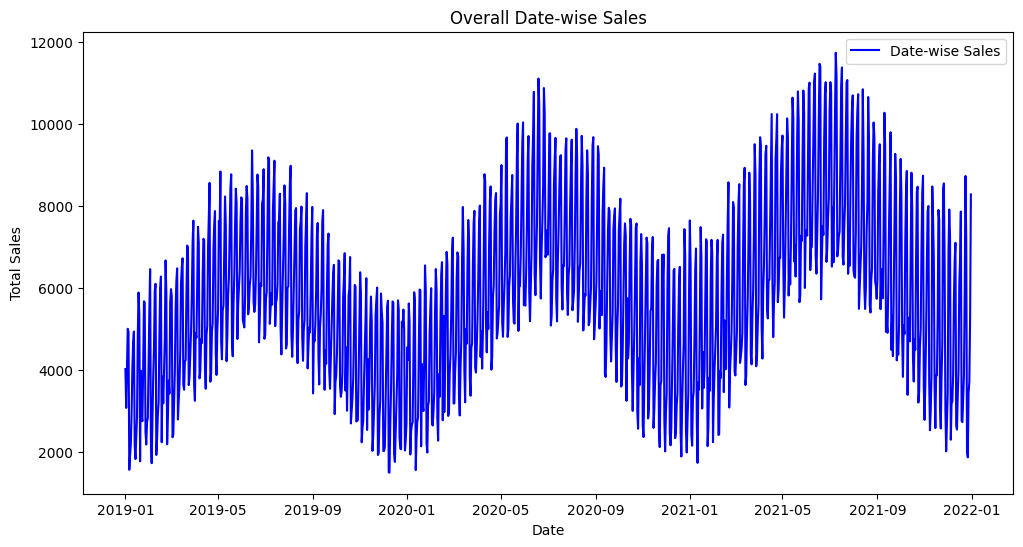

In [20]:
# Exploratory Data Analysis
# a.Overall date-wise sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales, label='Date-wise Sales', color='blue')
plt.title('Overall Date-wise Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [21]:
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88
...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00


In [22]:
#b.Find out how sales fluctuate across different days of the week
final_data['day_of_week'] = final_data['date'].dt.day_name()
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales,day_of_week
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44,Tuesday
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Wednesday
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Thursday
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32,Friday
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88,Saturday
...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Monday
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Tuesday
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Wednesday
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Thursday


In [23]:
daywise_sales = final_data[['day_of_week','sales']].groupby('day_of_week').sum()
daywise_sales


,sales
day_of_week,
Friday,1257338.16
Monday,644799.97
Saturday,1250574.32
Sunday,630279.71
Thursday,1073534.52
Tuesday,734598.46
Wednesday,812613.31


In [24]:
daywise_sales = final_data[['day_of_week','sales']].groupby('day_of_week').sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
daywise_sales


,sales
day_of_week,
Monday,644799.97
Tuesday,734598.46
Wednesday,812613.31
Thursday,1073534.52
Friday,1257338.16
Saturday,1250574.32
Sunday,630279.71


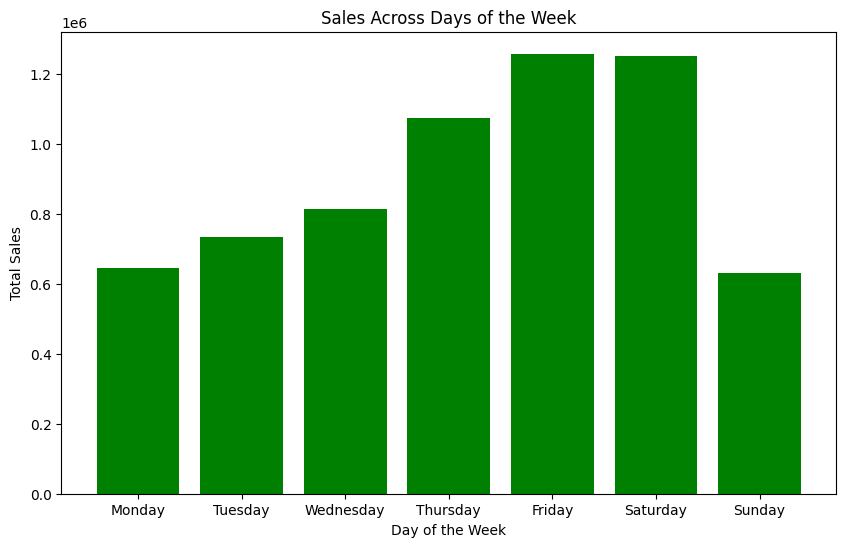

In [25]:
plt.figure(figsize=(10, 6))
plt.bar(daywise_sales.index, daywise_sales['sales'], color='green')
plt.title('Sales Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.show()


In [26]:
#c. Sales trends for different months of the year
final_data['month'] = final_data['date'].dt.month_name()
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales,day_of_week,month
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44,Tuesday,January
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Wednesday,January
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Thursday,January
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32,Friday,January
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88,Saturday,January
...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Monday,December
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Tuesday,December
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Wednesday,December
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Thursday,December


In [27]:
monthwise_sales = final_data[['month','sales']].groupby('month').sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
monthwise_sales


,sales
month,
January,375778.02
February,394527.38
March,498218.89
April,571458.39
May,666063.17
June,691116.06
July,706038.79
August,647024.97
September,548927.39


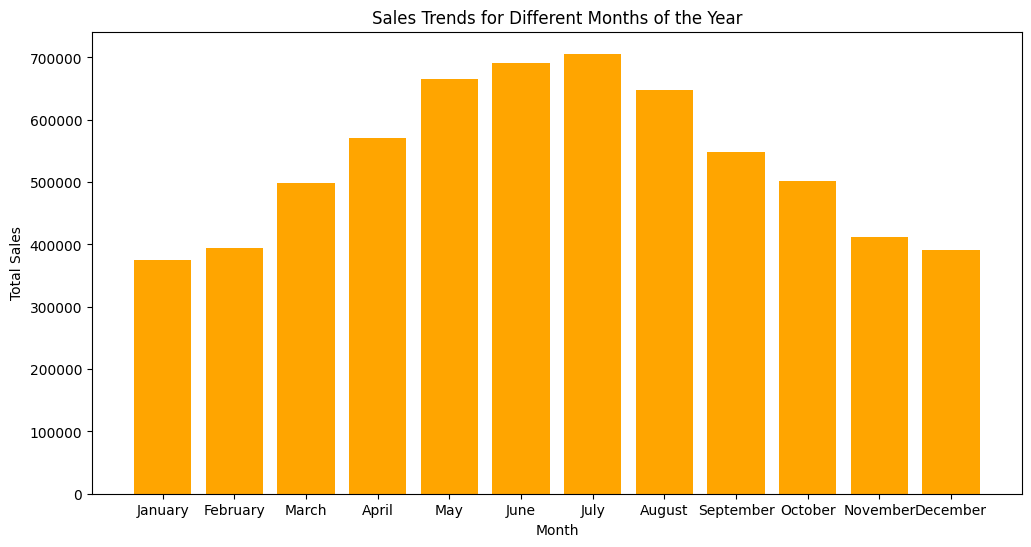

In [28]:
plt.figure(figsize=(12, 6))
plt.bar(monthwise_sales.index, monthwise_sales['sales'], color='orange')
plt.title('Sales Trends for Different Months of the Year')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


In [29]:
# d.Sales distribution across quarters averaged over years
final_data['quarter'] = final_data['date'].dt.to_period('Q')
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales,day_of_week,month,quarter
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44,Tuesday,January,2019Q1
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Wednesday,January,2019Q1
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Thursday,January,2019Q1
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32,Friday,January,2019Q1
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88,Saturday,January,2019Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Monday,December,2021Q4
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Tuesday,December,2021Q4
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Wednesday,December,2021Q4
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Thursday,December,2021Q4


In [30]:
final_data['quarter'].nunique()


12

In [31]:
final_data['quarter'].unique()


<PeriodArray>
['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
 '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4']
Length: 12, dtype: period[Q-DEC]

In [32]:
quarterwise_sales=final_data[['quarter','sales']].groupby('quarter').sum().reindex(['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
 '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4'])
quarterwise_sales


,sales
quarter,
2019Q1,376464.62
2019Q2,568910.96
2019Q3,552584.99
2019Q4,373801.74
2020Q1,416037.04
2020Q2,635915.37
2020Q3,637832.82
2020Q4,443895.55
2021Q1,476022.63


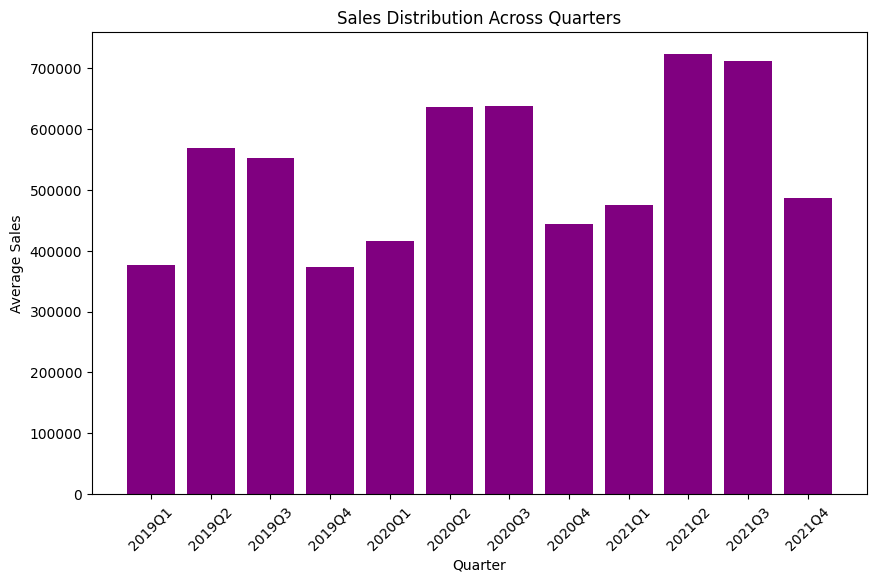

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(quarterwise_sales.index, quarterwise_sales['sales'], color='purple')
plt.title('Sales Distribution Across Quarters')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()


In [34]:
#e.Compare performances of different restaurants


In [35]:
final_data['name_store'].unique()


array(["Bob's Diner", 'Surfs Up', 'Beachfront Bar', 'Fou Cher',
       'Corner Cafe', 'Sweet Shack'], dtype=object)

In [36]:
final_data['name_store'].unique().tolist()


["Bob's Diner",
 'Surfs Up',
 'Beachfront Bar',
 'Fou Cher',
 'Corner Cafe',
 'Sweet Shack']

In [37]:
restaurant_sales=final_data[['name_store','sales']].groupby('name_store').sum().reindex(["Bob's Diner",
 "Surfs Up","Beachfront Bar","Fou Cher","Corner Cafe","Sweet Shack"])
restaurant_sales


,sales
name_store,
Bob's Diner,6337275.69
Surfs Up,15651.49
Beachfront Bar,3796.20
Fou Cher,27885.37
Corner Cafe,16551.43
Sweet Shack,2578.27


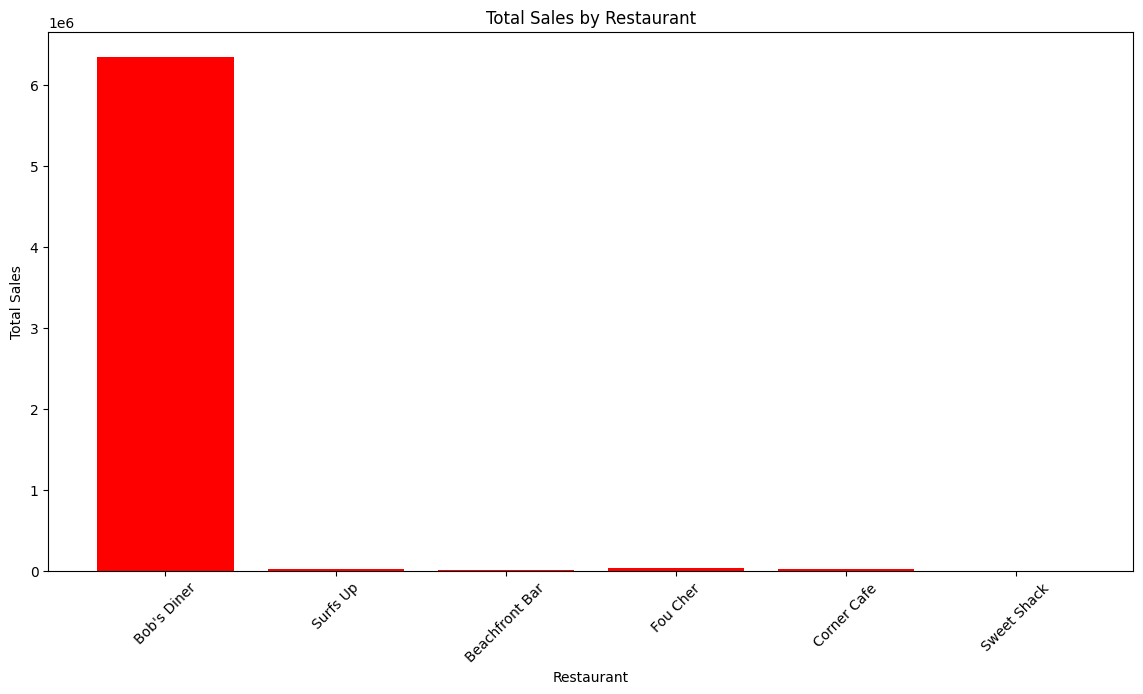

In [38]:
plt.figure(figsize=(14, 7))
plt.bar(restaurant_sales.index, restaurant_sales['sales'], color='red')
plt.title('Total Sales by Restaurant')
plt.xlabel('Restaurant')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [39]:
#Find the restaurant with the most sales
most_sales_restaurant = restaurant_sales.idxmax()
print(f'The restaurant with the most sales is: {most_sales_restaurant}')


The restaurant with the most sales is: sales    Bob's Diner
dtype: object


In [40]:
#Sales for each restaurant across different years, months, and days
year_month_day_sales = final_data.copy()
year_month_day_sales['year'] = final_data['date'].dt.year
year_month_day_sales['month'] = final_data['date'].dt.month_name()
year_month_day_sales['day'] = final_data['date'].dt.day_name()


In [41]:
restaurant_yearly_sales = year_month_day_sales.groupby(['name_store', 'year'])['sales'].sum()
restaurant_monthly_sales = year_month_day_sales.groupby(['name_store', 'month'])['sales'].sum()
restaurant_daily_sales = year_month_day_sales.groupby(['name_store', 'day'])['sales'].sum()


In [42]:
print('\nYearly Sales by Restaurant:\n')
restaurant_yearly_sales



Yearly Sales by Restaurant:



name_store      year
Beachfront Bar  2019       1281.85
                2020       1267.21
                2021       1247.14
Bob's Diner     2019    1849483.49
                2020    2112331.91
                2021    2375460.29
Corner Cafe     2019       5292.93
                2020       5347.71
                2021       5910.79
Fou Cher        2019       9698.80
                2020       8590.87
                2021       9595.70
Surfs Up        2019       5132.65
                2020       5314.43
                2021       5204.41
Sweet Shack     2019        872.59
                2020        828.65
                2021        877.03
Name: sales, dtype: float64

In [43]:
print('\nMonthly Sales by Restaurant:\n', restaurant_monthly_sales)



Monthly Sales by Restaurant:
 name_store      month    
Beachfront Bar  April        317.58
                August       284.38
                December     390.13
                February     318.10
                January      315.55
                              ...  
Sweet Shack     March        215.91
                May          234.47
                November     199.38
                October      224.80
                September    214.06
Name: sales, Length: 72, dtype: float64


In [44]:
print('\nDaily Sales by Restaurant:\n', restaurant_daily_sales)



Daily Sales by Restaurant:
 name_store      day      
Beachfront Bar  Friday           508.79
                Monday           544.78
                Saturday         538.93
                Sunday           523.11
                Thursday         518.58
                Tuesday          548.72
                Wednesday        613.29
Bob's Diner     Friday       1247393.16
                Monday        635165.98
                Saturday     1241421.51
                Sunday        621069.50
                Thursday     1063813.76
                Tuesday       725443.80
                Wednesday     802967.98
Corner Cafe     Friday          2460.83
                Monday          2395.01
                Saturday        2317.59
                Sunday          2426.59
                Thursday        2343.02
                Tuesday         2487.38
                Wednesday       2121.01
Fou Cher        Friday          4227.35
                Monday          3927.47
                Saturday 

In [45]:
# f.Identify the most popular items overall and by store
most_popular_items = final_data.groupby('name_item')['item_count'].sum().sort_values(ascending=False)
most_popular_items


name_item
Strawberry Smoothy                            236337.0
Frozen Milky Smoothy                          103263.0
Amazing pork lunch                             61043.0
Mutton Dinner                                  52772.0
Orange Juice                                   43874.0
                                                ...   
Original Milky Cake                                0.0
Fantastic Fruity Salmon with Bread meal            0.0
Awesome Fruity Lamb with Vegetables Dinner         0.0
Blue Ribbon Frozen Milky Cake                      0.0
Original Fruity Carrot Cake                        0.0
Name: item_count, Length: 94, dtype: float64

In [46]:
print('\nMost Popular Items Overall:\n', most_popular_items.head())



Most Popular Items Overall:
 name_item
Strawberry Smoothy      236337.0
Frozen Milky Smoothy    103263.0
Amazing pork lunch       61043.0
Mutton Dinner            52772.0
Orange Juice             43874.0
Name: item_count, dtype: float64


In [47]:
most_popular_items_by_store = final_data.groupby(['name_store', 'name_item'])['item_count'].sum().sort_values(ascending=False)
print('\nMost Popular Items by Store:\n', most_popular_items_by_store.head())



Most Popular Items by Store:
 name_store   name_item           
Bob's Diner  Strawberry Smoothy      236337.0
             Frozen Milky Smoothy    102990.0
             Amazing pork lunch       61043.0
             Mutton Dinner            52772.0
             Orange Juice             43874.0
Name: item_count, dtype: float64


In [48]:
# g.Determine if the top store by sales volume makes the most money per day
store_daily_revenue = final_data.groupby(['name_store']).apply(lambda x: x.groupby('date')['price'].sum().mean())
most_revenue_store = store_daily_revenue.idxmax()
print(f'\nStore with the highest average daily revenue: {most_revenue_store}')
print('\nDaily Revenue by Store:\n', store_daily_revenue.head())



Store with the highest average daily revenue: Fou Cher

Daily Revenue by Store:
 name_store
Beachfront Bar     21.51
Bob's Diner       293.08
Corner Cafe       320.92
Fou Cher          358.95
Surfs Up          139.70
dtype: float64


In [49]:
# h.Identify the most expensive item at each restaurant and its calorie count
most_expensive_items = final_data.loc[final_data.groupby('name_store')['price'].idxmax()][['name_store', 'name_item', 'price', 'kcal']]
print('\nMost Expensive Items by Restaurant:\n', most_expensive_items)



Most Expensive Items by Restaurant:
             name_store                      name_item  price  kcal
39456   Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
0          Bob's Diner              Sweet Fruity Cake  29.22   931
85488      Corner Cafe                     Pike Lunch  26.37   653
66856         Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
26304         Surfs Up                     Steak Meal  26.21   607
106312     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


In [50]:
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales,day_of_week,month,quarter
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44,Tuesday,January,2019Q1
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Wednesday,January,2019Q1
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,Thursday,January,2019Q1
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32,Friday,January,2019Q1
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88,Saturday,January,2019Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Monday,December,2021Q4
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Tuesday,December,2021Q4
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Wednesday,December,2021Q4
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,Thursday,December,2021Q4


In [51]:
# Feature Engineering
final_data['day_of_week'] = final_data['date'].dt.dayofweek
final_data['quarter'] = final_data['date'].dt.quarter
final_data['month'] = final_data['date'].dt.month
final_data['year'] = final_data['date'].dt.year
final_data['day_of_month'] = final_data['date'].dt.day
final_data


,date,item_id,price,item_count,name_item,kcal,store_id,name_store,sales,day_of_week,month,quarter,year,day_of_month
0,2019-01-01,3,29.22,2.0,Sweet Fruity Cake,931,1,Bob's Diner,58.44,1,1,1,2019,1
1,2019-01-02,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,2,1,1,2019,2
2,2019-01-03,3,29.22,0.0,Sweet Fruity Cake,931,1,Bob's Diner,0.00,3,1,1,2019,3
3,2019-01-04,3,29.22,6.0,Sweet Fruity Cake,931,1,Bob's Diner,175.32,4,1,1,2019,4
4,2019-01-05,3,29.22,4.0,Sweet Fruity Cake,931,1,Bob's Diner,116.88,5,1,1,2019,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-27,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,0,12,4,2021,27
109596,2021-12-28,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,1,12,4,2021,28
109597,2021-12-29,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,2,12,4,2021,29
109598,2021-12-30,86,6.50,0.0,Original Milky Cake,595,3,Sweet Shack,0.00,3,12,4,2021,30


In [52]:
# Aggregate data by date for modeling
daily_sales = final_data.groupby('date').agg({
    'item_count': 'sum',
    'day_of_week': 'first',
    'quarter': 'first',
    'month': 'first',
    'year': 'first',
    'day_of_month': 'first'
}).reset_index()
daily_sales


,date,item_count,day_of_week,quarter,month,year,day_of_month
0,2019-01-01,427.0,1,1,1,2019,1
1,2019-01-02,337.0,2,1,1,2019,2
2,2019-01-03,445.0,3,1,1,2019,3
3,2019-01-04,564.0,4,1,1,2019,4
4,2019-01-05,552.0,5,1,1,2019,5
...,...,...,...,...,...,...,...
1091,2021-12-27,192.0,0,4,12,2021,27
1092,2021-12-28,344.0,1,4,12,2021,28
1093,2021-12-29,371.0,2,4,12,2021,29
1094,2021-12-30,527.0,3,4,12,2021,30


In [53]:
last_6_months_daily_sales=daily_sales.loc[(daily_sales['month']>=7)&(daily_sales['year']==2021)]
last_6_months_daily_sales


,date,item_count,day_of_week,quarter,month,year,day_of_month
912,2021-07-01,1070.0,3,3,7,2021,1
913,2021-07-02,1167.0,4,3,7,2021,2
914,2021-07-03,1132.0,5,3,7,2021,3
915,2021-07-04,677.0,6,3,7,2021,4
916,2021-07-05,815.0,0,3,7,2021,5
...,...,...,...,...,...,...,...
1091,2021-12-27,192.0,0,4,12,2021,27
1092,2021-12-28,344.0,1,4,12,2021,28
1093,2021-12-29,371.0,2,4,12,2021,29
1094,2021-12-30,527.0,3,4,12,2021,30


In [54]:
last_6_months_daily_sales.shape


(184, 7)

In [55]:
# Split data into training and testing sets (last 6 months for testing)
test_size = 184
train_data = daily_sales[:-test_size]
test_data = daily_sales[-test_size:]


In [56]:
train_data.shape


(912, 7)

In [57]:
test_data.shape


(184, 7)

In [58]:
X_train = train_data[['day_of_week', 'quarter', 'month', 'year', 'day_of_month']]
y_train = train_data['item_count']
X_test = test_data[['day_of_week', 'quarter', 'month', 'year', 'day_of_month']]
y_test = test_data['item_count']


In [59]:
X_train.shape


(912, 5)

In [60]:
X_test.shape


(184, 5)

In [61]:
y_train.shape


(912,)

In [62]:
y_test.shape


(184,)

In [63]:
# Model Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

rmse_results = {}


In [64]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_results[model_name] = rmse
    print(f"{model_name} RMSE: {rmse:.2f}")

# Select the best model
best_model_name = min(rmse_results, key=rmse_results.get)
best_model = models[best_model_name]
print(best_model)


Linear Regression RMSE: 246.54
Random Forest RMSE: 62.16
XGBoost RMSE: 61.22
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [65]:
daily_sales['item_count'].mean()


633.9297445255474

In [66]:
rmse_results


{'Linear Regression': 246.53517149655562,
 'Random Forest': 62.15626702898318,
 'XGBoost': 61.2200101596937}

In [67]:
#Linear Regression Accuracy
1-(rmse_results['Linear Regression']/daily_sales['item_count'].mean())


0.6111001674466779

In [68]:
#Random Forest Accuracy
1-(rmse_results['Random Forest']/daily_sales['item_count'].mean())


0.9019508588045465

In [69]:
#XGBoost Accuracy
1-(rmse_results['XGBoost']/daily_sales['item_count'].mean())


0.9034277683160101

In [70]:
print(f'best model is XGBoost with {round(1-(rmse_results["XGBoost"]/daily_sales["item_count"].mean()),3)}')


best model is XGBoost with 0.903


In [71]:
#compare the last 6 months item_count data with predicted data by visualizing the prediction 


In [72]:
test_size


184

In [73]:
last_6_months_daily_sales=daily_sales[-test_size:]
last_6_months_daily_sales


,date,item_count,day_of_week,quarter,month,year,day_of_month
912,2021-07-01,1070.0,3,3,7,2021,1
913,2021-07-02,1167.0,4,3,7,2021,2
914,2021-07-03,1132.0,5,3,7,2021,3
915,2021-07-04,677.0,6,3,7,2021,4
916,2021-07-05,815.0,0,3,7,2021,5
...,...,...,...,...,...,...,...
1091,2021-12-27,192.0,0,4,12,2021,27
1092,2021-12-28,344.0,1,4,12,2021,28
1093,2021-12-29,371.0,2,4,12,2021,29
1094,2021-12-30,527.0,3,4,12,2021,30


In [74]:
last_6_months_daily_sales.shape


(184, 7)

In [75]:
X_test.shape


(184, 5)

In [76]:
last_6_months_forecast = best_model.predict(X_test)
last_6_months_forecast


array([ 991.81213, 1109.395  , 1131.9951 ,  616.3512 ,  629.5346 ,
        776.8735 ,  855.10834,  999.498  , 1139.3787 , 1111.3457 ,
        627.6014 ,  679.7115 ,  794.1911 ,  843.11176, 1001.55786,
       1135.2736 , 1165.0271 ,  689.66846,  670.0544 ,  773.17896,
        832.7404 ,  980.732  , 1096.4393 , 1167.25   ,  638.9735 ,
        688.68304,  807.20935,  804.1696 ,  995.71643, 1108.64   ,
       1091.3804 ,  573.8951 ,  646.20667,  721.3769 ,  780.76483,
        998.4671 , 1127.0974 , 1115.6293 ,  567.5162 ,  647.2673 ,
        711.96313,  774.44635,  966.0187 , 1095.1328 , 1106.8019 ,
        552.91223,  632.0317 ,  698.33   ,  722.978  ,  958.37964,
       1054.8921 , 1073.1515 ,  548.89984,  618.2612 ,  709.6749 ,
        684.0976 ,  962.26544, 1058.064  , 1075.5724 ,  539.1226 ,
        667.4308 ,  730.7889 ,  688.68134,  855.4615 ,  977.9833 ,
       1042.3068 ,  525.42737,  634.0283 ,  725.7381 ,  663.00214,
        852.58136,  951.65704,  984.06647,  476.5632 ,  522.22

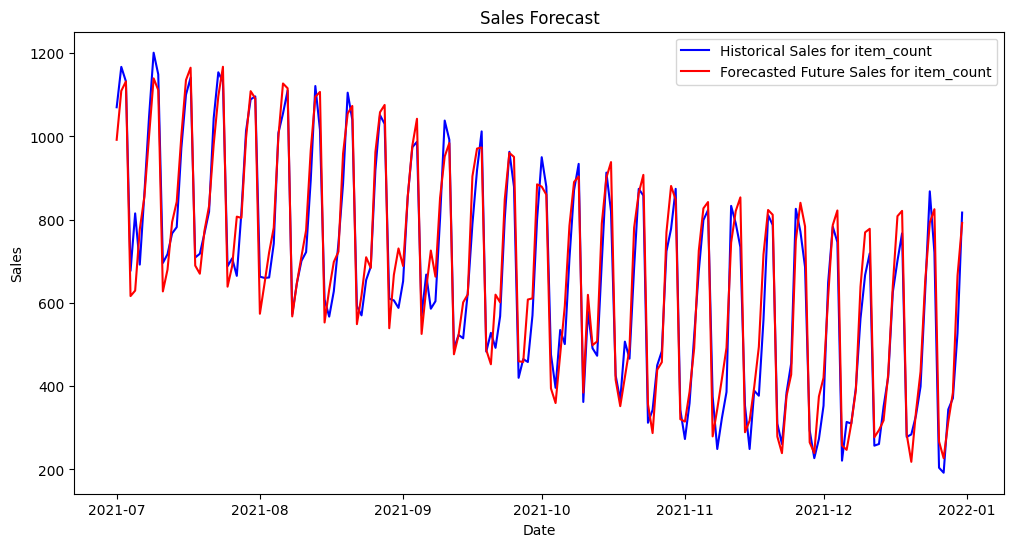

In [77]:
# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(last_6_months_daily_sales['date'], last_6_months_daily_sales['item_count'], label='Historical Sales for item_count', color='blue')
plt.plot(last_6_months_daily_sales['date'], last_6_months_forecast, label='Forecasted Future Sales for item_count', color='red')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [78]:
# Forecast for the next year
future_dates = pd.date_range(start=daily_sales['date'].max() + pd.Timedelta(days=1), periods=365)
future_dates


DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [79]:
future_features = pd.DataFrame({
    'day_of_week': future_dates.dayofweek,
    'quarter': future_dates.quarter,
    'month': future_dates.month,
    'year': future_dates.year,
    'day_of_month': future_dates.day
})
future_features


,day_of_week,quarter,month,year,day_of_month
0,5,1,1,2022,1
1,6,1,1,2022,2
2,0,1,1,2022,3
3,1,1,1,2022,4
4,2,1,1,2022,5
...,...,...,...,...,...
360,1,4,12,2022,27
361,2,4,12,2022,28
362,3,4,12,2022,29
363,4,4,12,2022,30


In [80]:
best_model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [81]:
forecast = best_model.predict(future_features)
forecast


array([ 754.2809 ,  269.1115 ,  254.6201 ,  327.58575,  332.87698,
        540.83545,  693.1414 ,  668.3484 ,  279.14597,  190.39972,
        332.5187 ,  341.544  ,  568.5458 ,  711.2371 ,  739.7317 ,
        273.17395,  497.58948,  333.8483 ,  399.59906,  616.7736 ,
        763.5491 ,  736.7183 ,  229.51219,  270.16684,  357.11176,
        420.15234,  621.44   ,  773.76044,  727.0788 ,  235.07611,
        289.0291 ,  432.0131 ,  445.21088,  595.31226,  723.7268 ,
        723.9155 ,  278.20108,  290.0625 ,  376.1402 ,  404.20743,
        590.826  ,  768.37085,  762.1987 ,  342.76147,  380.77823,
        460.6218 ,  444.9749 ,  643.1997 ,  753.7974 ,  803.04236,
        322.68805,  448.10474,  446.41693,  473.76666,  669.61975,
        824.072  ,  853.4078 ,  377.93976,  372.202  ,  485.49286,
        544.0065 ,  715.4927 ,  836.3643 ,  853.52637,  424.3273 ,
        430.35294,  477.66956,  533.14044,  713.5149 ,  872.6025 ,
        893.1938 ,  432.37378,  414.96994,  496.4033 ,  557.21

In [82]:
future_forecast_df = pd.DataFrame({
    'date': future_dates,
    'predicted_item_count': forecast
})
future_forecast_df


,date,predicted_item_count
0,2022-01-01,754.280884
1,2022-01-02,269.111511
2,2022-01-03,254.620102
3,2022-01-04,327.585754
4,2022-01-05,332.876984
...,...,...
360,2022-12-27,320.215790
361,2022-12-28,374.659363
362,2022-12-29,670.523926
363,2022-12-30,797.601318


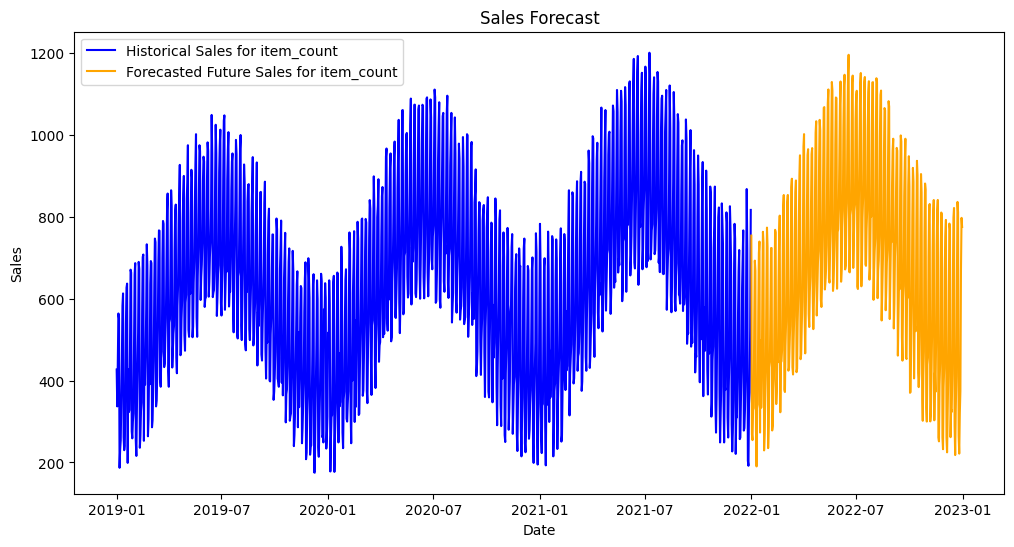

In [83]:
# Plot the forecast for past and future
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['item_count'], label='Historical Sales for item_count', color='blue')
plt.plot(future_forecast_df['date'], future_forecast_df['predicted_item_count'], label='Forecasted Future Sales for item_count', color='orange')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [84]:
# Display forecasted sales
print("\nForecasted Sales of item_count for Next Year:")
print(future_forecast_df.head())



Forecasted Sales of item_count for Next Year:
        date  predicted_item_count
0 2022-01-01            754.280884
1 2022-01-02            269.111511
2 2022-01-03            254.620102
3 2022-01-04            327.585754
4 2022-01-05            332.876984
